<a href="https://colab.research.google.com/github/lenagrumbach/shark_attack/blob/main/Shark_Attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

## Context and Objective
      
   A tour company requested the following information about shark attacks.
    
   - Top 10 countries with the most shark attacks.
   - In each country the 3 locations where the most attacks took place.
   - The 4 most dangerous water activities.
   - The 6 months that has the most attacks over the years.
   - The evolution of shark attacks over the past 50 years.


##Importing Data



In [2]:
from google.colab import drive
 
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [3]:
df_shark_attacks = pd.read_csv(r"/drive/MyDrive/Shark_Attacks_Project/attacks.csv", encoding = "latin-1")

In [4]:
df_shark_attacks.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN


In [5]:
df_shark_attacks.shape

(25723, 24)

In [6]:
pd.options.display.max_columns=30
display(df_shark_attacks)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Part 1 - Data Quality

### Data completion verification
check for null values in columns and lines

In [7]:
df_shark_attacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [8]:
colunas_percentual_preenchimento = round(df_shark_attacks.count() * 100 / (len(df_shark_attacks)), 2).reset_index()
colunas_percentual_preenchimento.rename(columns={'index':'Colunas', 0:'Percentual Preenchido'})


,Colunas,Percentual Preenchido
0,Case Number,33.83
1,Date,24.50
2,Year,24.49
3,Type,24.48
4,Country,24.31
5,Area,22.73
6,Location,22.40
7,Activity,22.38
8,Name,23.68
9,Sex,22.30


23 columns have less than 25% fill and 2 columns have nearly 0% fill.

Delete columns colunas 'Unnamed: 22' and 'Unnamed: 23'

Delete rows less than 3 out of 24 filled columns.

In [9]:
df_shark_attacks.drop(['Unnamed: 22', 'Unnamed: 23'], axis=1, inplace=True)

In [10]:
df_shark_attacks = df_shark_attacks.dropna(thresh=3)

In [11]:
linhas_duplicadas = df_shark_attacks.duplicated()
linhas_duplicadas.sum()

0

In [12]:
df_shark_attacks.shape

(6302, 22)

## Part 2 - Find the columns that contain relevant information to this analysis and do data clean.

In [13]:
df_shark_attacks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


###2.1 Column 'Country'

In [14]:
(df_shark_attacks['Country'].unique())

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA',
       'ECUADOR', 'MALAYSIA', 'LIBYA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SAMOA', 'SOLOMON ISLANDS', 'JAPAN',
       'EGYPT', 'ST HELENA, British overseas territory', 'COMOROS',
       'REUNION', 'FRENCH POLYNESIA', 'UNITED KINGDOM',
       'UNITED ARAB EMIRATES', 'PHILIPPINES', 'INDONESIA', 'CHINA',
       'COLUMBIA', 'CAPE VERDE', 'Fiji', 'DOMINICAN REPUBLIC',
       'CAYMAN ISLANDS', 'ARUBA', 'MOZAMBIQUE', 'FIJI', 'PUERTO RICO',
       'ITALY', 'ATLANTIC OCEAN', 'GREECE', 'ST. MARTIN', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'CROATIA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA',
       'RUSSIA', 'TURKS & CAICOS', 'UNITE

In [15]:
df_shark_attacks['pais'] = df_shark_attacks['Country'].str.upper()

**Top 10 countries with the most shark attacks.**

In [16]:
total_por_pais = ((df_shark_attacks['pais'].value_counts(normalize=True).round(2)*100).astype(str)+' %').to_frame().reset_index().rename(columns = {'pais':'attacks_percentage', 'index':'country'})
total_por_pais.head(10)

,country,attacks_percentage
0,USA,36.0 %
1,AUSTRALIA,21.0 %
2,SOUTH AFRICA,9.0 %
3,PAPUA NEW GUINEA,2.0 %
4,NEW ZEALAND,2.0 %
5,BRAZIL,2.0 %
6,BAHAMAS,2.0 %
7,MEXICO,1.0 %
8,ITALY,1.0 %
9,FIJI,1.0 %


###2.2 Column 'Area'

In [17]:
(df_shark_attacks['Area'].unique())

array(['California', 'Georgia', 'Hawaii', 'New South Wales', 'Colima',
       'Pernambuco', 'Florida', 'Queensland', 'South Carolina',
       'Cornwall', 'Westerm Australia', 'Eastern Cape Province',
       'Hua Hin', 'Cocos Island', 'Western Australia',
       'Alifu Alifu Atoll', 'Western Cape Province', 'New Providence',
       'Alagoas', nan, 'Victoria', 'KwaZulu-Natal',
       'Boi Island, Victoria', 'Galapagos Islands', 'Fernando de Noronha',
       'Sepang', 'Holquin Province', 'Pamplemousses ', 'South Australia',
       'North Island', 'New York', 'Canary Islands', ' Upolu Island',
       'Shizuoka Prefecture', 'Texas', 'Castellón', 'Massachusetts',
       'Red Sea Protectorate', 'New Providence District',
       '40 miles off Grand Bahama Island', 'Ascension Island',
       'New Jersey', 'Majorca', 'Washington', 'Tabasco', 'Anjouan',
       'Ibiza Island', 'Marquesas', 'South Devon', 'New Providence ',
       'Sharjah, ', 'Baja California Sur', 'Saint-Leu', 'South Island',
   

In [18]:
df_shark_attacks['localidade'] = df_shark_attacks['Area'].str.title()

In [19]:
for nome in total_por_pais['country']:
  mascara_pais = total_por_pais['country'] == nome
  total_por_pais.loc[mascara_pais, 'localidades_mais_perigosas'] = str(df_shark_attacks.query(f'pais == "{nome}"').groupby('localidade')['Case Number'].count().sort_values(ascending=False)[:3].index.to_list())

**In each country the 3 locations where the most attacks took place.**

In [31]:
most_dangerous_locations = total_por_pais[:10]
most_dangerous_locations = most_dangerous_locations.rename(columns = {'country':'country', 'attacks_percentage':'attacks_percentage', 'localidades_mais_perigosas':'most_dangerous_locations'}).style.set_properties(subset=['most_dangerous_locations'], **{'width': '300px'})
most_dangerous_locations

,country,attacks_percentage,most_dangerous_locations
0,USA,36.0 %,"['Florida', 'Hawaii', 'California']"
1,AUSTRALIA,21.0 %,"['New South Wales', 'Queensland', 'Western Australia']"
2,SOUTH AFRICA,9.0 %,"['Kwazulu-Natal', 'Western Cape Province', 'Eastern Cape Province']"
3,PAPUA NEW GUINEA,2.0 %,"['Central Province', 'Madang Province', 'New Ireland Province']"
4,NEW ZEALAND,2.0 %,"['North Island', 'South Island', 'Cook Islands']"
5,BRAZIL,2.0 %,"['Pernambuco', 'Rio De Janeiro', 'Maranhão']"
6,BAHAMAS,2.0 %,"['Abaco Islands', 'Grand Bahama Island', 'Andros Islands']"
7,MEXICO,1.0 %,"['Veracruz', 'Guerrero', 'Quintana Roo']"
8,ITALY,1.0 %,"['Tyrrhenian Sea', 'Sicily', 'Adriatic Sea']"
9,FIJI,1.0 %,"['Viti Levu Island', 'Taveuni', 'Vita Levu']"


###2.3 Column 'Activity'.

In [32]:
df_shark_attacks['Activity'].value_counts()[:30]

Surfing            971
Swimming           869
Fishing            431
Spearfishing       333
Bathing            162
Wading             149
Diving             127
Standing            99
Snorkeling          89
Scuba diving        76
Body boarding       61
Body surfing        49
Swimming            47
Kayaking            33
Treading water      32
Pearl diving        32
Fell overboard      32
Free diving         29
Boogie boarding     29
Windsurfing         19
Walking             17
Boogie Boarding     16
Shark fishing       15
Floating            14
Fishing             13
Canoeing            13
Surf skiing         12
Surf fishing        12
Surf-skiing         12
Rowing              12
Name: Activity, dtype: int64

In [33]:
df_shark_attacks['atividade'] = df_shark_attacks['Activity'].str.lower().str.replace('.*surf.*', 'Surf', regex=True).str.replace('.*swimming.*', 'Nado', regex=True).str.replace('.*fishing.*', 'Pesca', regex=True).str.replace('.*diving.*|.*snorkeling.*', 'Mergulho', regex=True).str.replace('.*bathing.*|.*wading.*|.*standing.*|.*treading water.*', 'Estar na agua', regex=True)

**The 4 most dangerous water activities.**

In [40]:
atividades = df_shark_attacks['atividade'].value_counts().to_frame().reset_index().rename(columns = {'index':'activity', 'atividade':'attacks'})
atividades[:4]

,activity,attacks
0,Surf,1261
1,Pesca,1132
2,Nado,1100
3,Mergulho,604


###2.4 Column 'Case Number'.



In [35]:
df_shark_attacks['Case Number'][:20]

0       2018.06.25
1       2018.06.18
2       2018.06.09
3       2018.06.08
4       2018.06.04
5     2018.06.03.b
6     2018.06.03.a
7       2018.05.27
8     2018.05.26.b
9     2018.05.26.a
10      2018.05.24
11      2018.05.21
12    2018.05.13.b
13    2018.05.13.a
14      2018.05.00
15      2018.05.12
16      2018.05.09
17    2018.04.30.R
18    2018.04.28.b
19    2018.04.28.a
Name: Case Number, dtype: object

In [36]:
df_shark_attacks['mes'] = df_shark_attacks['Case Number'].str.replace('.*\d{4}\.(\d{2}).*', r'\1', regex=True)
df_shark_attacks['mes'] = df_shark_attacks['mes'].str.replace('01', 'Jan', regex=True).str.replace('02', 'Fev', regex=True).str.replace('03', 'Mar', regex=True).str.replace('04', 'Abr', regex=True).str.replace('05', 'Mai', regex=True).str.replace('06', 'Jun', regex=True).str.replace('07', 'Jul', regex=True).str.replace('08', 'Ago', regex=True).str.replace('09', 'Set', regex=True).str.replace('10', 'Out', regex=True).str.replace('11', 'Nov', regex=True).str.replace('12', 'Dez', regex=True)#.value_counts()

In [38]:
ataques_por_mes = df_shark_attacks['mes'].value_counts().to_frame().reset_index().rename(columns = {'index':'month', 'mes':'attacks'})

**The 6 months that has the most attacks over the years.**

In [39]:
ataques_por_mes[:6]

,month,attacks
0,Jul,670
1,Ago,598
2,Set,554
3,Jan,520
4,Jun,499
5,Abr,458


###2.5 Column 'Case Number'.

In [41]:
df_shark_attacks['ano'] = df_shark_attacks['Case Number'].str.replace('.*(\d{4}).*', r'\1', regex=True)
df_shark_attacks['ano'].value_counts()

2015    143
2017    137
2016    130
2011    128
2014    127
       ... 
0725      1
0154      1
0153      1
0152      1
0001      1
Name: ano, Length: 372, dtype: int64

In [42]:
mascara_ano = df_shark_attacks['ano'].astype('float') > 1968
df_cinquenta_anos = df_shark_attacks.loc[mascara_ano]

In [44]:
evolucao = df_cinquenta_anos.groupby('ano')[['Case Number']].count().sort_values(by='ano', ascending=True)
evolucao_anual = evolucao.reset_index().rename(columns={'ano':'year','Case Number':'attacks'})

**The evolution of shark attacks over the past 50 years.**

In [45]:
evolucao_anual

,year,attacks
0,1969,29
1,1970,42
2,1971,27
3,1972,35
4,1973,27
5,1974,38
6,1975,49
7,1976,39
8,1977,26
9,1978,25


## Part 3 - Conclusion.

###✅ **Top 10 countries with the most shark attacks.**

In [51]:
total_por_pais = ((df_shark_attacks['pais'].value_counts(normalize=True).round(2)*100).astype(str)+' %').to_frame().reset_index().rename(columns = {'pais':'attacks_percentage', 'index':'country'})
total_por_pais.head(10)

,country,attacks_percentage
0,USA,36.0 %
1,AUSTRALIA,21.0 %
2,SOUTH AFRICA,9.0 %
3,PAPUA NEW GUINEA,2.0 %
4,NEW ZEALAND,2.0 %
5,BRAZIL,2.0 %
6,BAHAMAS,2.0 %
7,MEXICO,1.0 %
8,ITALY,1.0 %
9,FIJI,1.0 %


###✅ **In each country the 3 locations where the most attacks took place.**

In [50]:
most_dangerous_locations = total_por_pais[:10]
most_dangerous_locations = most_dangerous_locations.rename(columns = {'country':'country', 'attacks_percentage':'attacks_percentage', 'localidades_mais_perigosas':'most_dangerous_locations'}).style.set_properties(subset=['most_dangerous_locations'], **{'width': '300px'})
most_dangerous_locations

,pais,percentual_ataque,most_dangerous_locations
0,USA,36.0 %,"['Florida', 'Hawaii', 'California']"
1,AUSTRALIA,21.0 %,"['New South Wales', 'Queensland', 'Western Australia']"
2,SOUTH AFRICA,9.0 %,"['Kwazulu-Natal', 'Western Cape Province', 'Eastern Cape Province']"
3,PAPUA NEW GUINEA,2.0 %,"['Central Province', 'Madang Province', 'New Ireland Province']"
4,NEW ZEALAND,2.0 %,"['North Island', 'South Island', 'Cook Islands']"
5,BRAZIL,2.0 %,"['Pernambuco', 'Rio De Janeiro', 'Maranhão']"
6,BAHAMAS,2.0 %,"['Abaco Islands', 'Grand Bahama Island', 'Andros Islands']"
7,MEXICO,1.0 %,"['Veracruz', 'Guerrero', 'Quintana Roo']"
8,ITALY,1.0 %,"['Tyrrhenian Sea', 'Sicily', 'Adriatic Sea']"
9,FIJI,1.0 %,"['Viti Levu Island', 'Taveuni', 'Vita Levu']"


###✅ **The 4 most dangerous water activities.**

In [52]:
atividades = df_shark_attacks['atividade'].value_counts().to_frame().reset_index().rename(columns = {'index':'activity', 'atividade':'attacks'})
atividades[:4]

,activity,attacks
0,Surf,1261
1,Pesca,1132
2,Nado,1100
3,Mergulho,604


###✅ **The 6 months that has the most attacks over the years.**

In [53]:
ataques_por_mes[:6]

,month,attacks
0,Jul,670
1,Ago,598
2,Set,554
3,Jan,520
4,Jun,499
5,Abr,458


###✅ **The evolution of shark attacks over the past 50 years.**

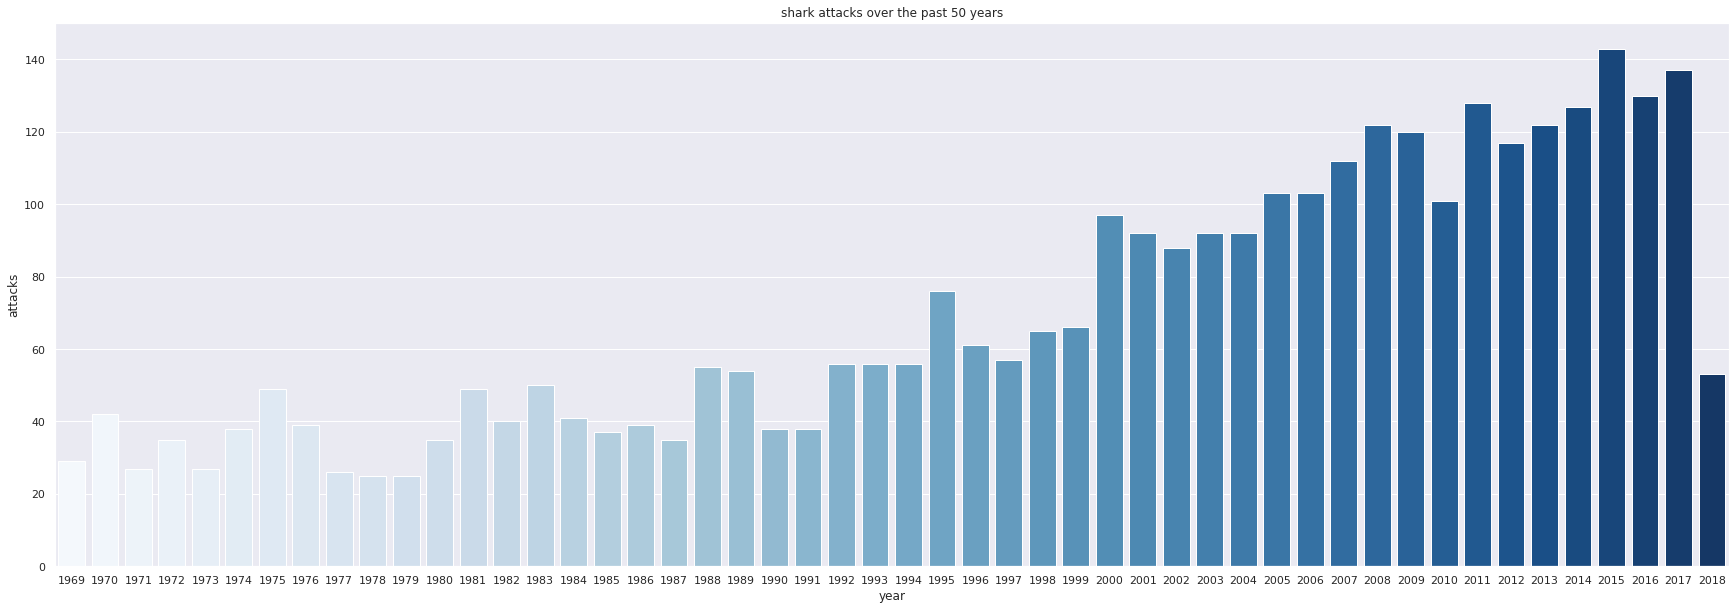

In [56]:
sns.set(rc={'figure.figsize':(30,10)})
sns.barplot(data=evolucao_anual , x='year', y='attacks', orient='v', palette='Blues',).set_title("shark attacks over the past 50 years");